# Gillian Tatreau
# DSC540
# Project Milestone 5
# 4 March 2023

## Load datasets into database
Saved DataFrame from each milestone as a new csv file after all transformations were completed, so will first load in each csv file before loading them into a sqlite database.

In [1]:
# import libraries
import pandas as pd
import sqlite3
import sqlalchemy as sqla

In [2]:
# load csv files of cleaned datasets
csv_df = pd.read_csv("/Users/gillian/Documents/Bellevue Grad Program/Winter 2022-23/DSC540/Final Project/csv_data.csv")
web_df = pd.read_csv("/Users/gillian/Documents/Bellevue Grad Program/Winter 2022-23/DSC540/Final Project/web_data.csv")
api_df = pd.read_csv("/Users/gillian/Documents/Bellevue Grad Program/Winter 2022-23/DSC540/Final Project/api_data.csv")

In [3]:
# set up connection for sqla
engine = sqla.create_engine('sqlite:///term_project.db', echo=True)
sqlite_conn = engine.connect()

In [4]:
# database for Milestone 2 (csv file)
csv_df.to_sql('csv_data', sqlite_conn, if_exists='replace', index = False)

2023-03-02 16:28:54,472 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("csv_data")
2023-03-02 16:28:54,476 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-02 16:28:54,477 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("csv_data")
2023-03-02 16:28:54,479 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-02 16:28:54,482 INFO sqlalchemy.engine.Engine 
CREATE TABLE csv_data (
	"bookID" BIGINT, 
	isbn TEXT, 
	title TEXT, 
	author TEXT, 
	contributors TEXT, 
	book_series TEXT, 
	average_rating FLOAT, 
	num_pages BIGINT, 
	ratings_count BIGINT, 
	text_reviews_count BIGINT, 
	isbn13 FLOAT, 
	language_code TEXT, 
	publication_date TEXT, 
	publisher TEXT
)


2023-03-02 16:28:54,485 INFO sqlalchemy.engine.Engine [no key 0.00294s] ()
2023-03-02 16:28:54,490 INFO sqlalchemy.engine.Engine COMMIT
2023-03-02 16:28:54,687 INFO sqlalchemy.engine.Engine INSERT INTO csv_data ("bookID", isbn, title, author, contributors, book_series, average_rating, num_pages, ratings_count, text_reviews_co

11127

In [5]:
# database for Milestone 3 (website data)
web_df.to_sql('web_data', sqlite_conn, if_exists='replace', index = False)

2023-03-02 16:29:01,481 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("web_data")
2023-03-02 16:29:01,484 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-02 16:29:01,486 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("web_data")
2023-03-02 16:29:01,487 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-02 16:29:01,489 INFO sqlalchemy.engine.Engine 
CREATE TABLE web_data (
	title TEXT, 
	"Author(s)" TEXT, 
	"Year published" TEXT, 
	"Approximate sales" FLOAT, 
	"Original language" TEXT, 
	book_series TEXT, 
	"No. of installments" TEXT, 
	"First published" TEXT, 
	first BIGINT, 
	last TEXT
)


2023-03-02 16:29:01,492 INFO sqlalchemy.engine.Engine [no key 0.00222s] ()
2023-03-02 16:29:01,495 INFO sqlalchemy.engine.Engine COMMIT
2023-03-02 16:29:01,506 INFO sqlalchemy.engine.Engine INSERT INTO web_data (title, "Author(s)", "Year published", "Approximate sales", "Original language", book_series, "No. of installments", "First published", first, last) VALUES (?, ?, ?, ?, ?, ?, 

297

In [6]:
# database for Milestone 4 (API data)
api_df.to_sql('api_data', sqlite_conn, if_exists='replace', index = False)

2023-03-02 16:29:02,505 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("api_data")
2023-03-02 16:29:02,511 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-02 16:29:02,514 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("api_data")
2023-03-02 16:29:02,517 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-02 16:29:02,523 INFO sqlalchemy.engine.Engine 
CREATE TABLE api_data (
	title TEXT, 
	first_listed_author TEXT, 
	contributor TEXT, 
	isbn10 TEXT, 
	isbn13 FLOAT, 
	bestsellers_list TEXT, 
	rank BIGINT, 
	rank_last_week BIGINT, 
	weeks_on_list BIGINT, 
	bestsellers_date TEXT, 
	publisher TEXT
)


2023-03-02 16:29:02,534 INFO sqlalchemy.engine.Engine [no key 0.01065s] ()
2023-03-02 16:29:02,554 INFO sqlalchemy.engine.Engine COMMIT
2023-03-02 16:29:02,581 INFO sqlalchemy.engine.Engine INSERT INTO api_data (title, first_listed_author, contributor, isbn10, isbn13, bestsellers_list, rank, rank_last_week, weeks_on_list, bestsellers_date, publisher) VALUES (?, ?, ?, ?, ?, ?, ?, 

685

In [7]:
# closing sqla connection
sqlite_conn.close()

In [8]:
# checking connection to each table
with sqlite3.connect("term_project.db") as conn:
    try:
        conn.execute("SELECT * FROM csv_data LIMIT 1")
        print("connection to csv_data table successful")
    except:
        print("unable to make connection")

connection to csv_data table successful


In [9]:
with sqlite3.connect("term_project.db") as conn:
    try:
        conn.execute("SELECT * FROM web_data LIMIT 1")
        print("connection to web_data table successful")
    except:
        print("unable to make connection")

connection to web_data table successful


In [10]:
with sqlite3.connect("term_project.db") as conn:
    try:
        conn.execute("SELECT * FROM api_data LIMIT 1")
        print("connection to api_data table successful")
    except:
        print("unable to make connection")

connection to api_data table successful


## Merge datasets together
Start with merging csv_data and web_data on title, then merging that to api_data on isbn.

In [11]:
# join csv_data and web_data with left join on title
with sqlite3.connect("term_project.db") as conn:
    curs = conn.cursor()
    sql = """
    CREATE TABLE csv_web_join AS
        SELECT * 
        FROM csv_data
        LEFT JOIN web_data
        ON csv_data.title = web_data.title
        """
    curs.execute(sql)
    conn.commit()
    rows = curs.execute ("SELECT * FROM csv_web_join LIMIT 5")
    for row in rows:
        print(row)

(1, '439785960', 'harry potter and the half-blood prince (harry potter  #6)', 'j.k. rowling', 'mary grandpré', 'n', 4.57, 652, 2095690, 27591, 9780000000000.0, 'eng', '2006-09-16', 'scholastic inc.', None, None, None, None, None, None, None, None, None, None)
(2, '439358078', 'harry potter and the order of the phoenix (harry potter  #5)', 'j.k. rowling', 'mary grandpré', 'n', 4.49, 870, 2153167, 29221, 9780000000000.0, 'eng', '2004-09-01', 'scholastic inc.', None, None, None, None, None, None, None, None, None, None)
(4, '439554896', 'harry potter and the chamber of secrets (harry potter  #2)', 'j.k. rowling', None, 'n', 4.42, 352, 6333, 244, 9780000000000.0, 'eng', '2003-11-01', 'scholastic', None, None, None, None, None, None, None, None, None, None)
(5, '043965548x', 'harry potter and the prisoner of azkaban (harry potter  #3)', 'j.k. rowling', 'mary grandpré', 'n', 4.56, 435, 2339585, 36325, 9780000000000.0, 'eng', '2004-05-01', 'scholastic inc.', None, None, None, None, None, None

In [12]:
# length of csv_web_join database
with sqlite3.connect("term_project.db") as conn:
    curs = conn.cursor()
    rows = curs.execute("SELECT count(*) ratings_count FROM csv_web_join")
    for row in rows:
        print("There are {} records in the csv_web_join database".format(row[0]))

There are 11127 records in the csv_web_join database


In [13]:
# join csv_web_join and api_data with left join on isbn
with sqlite3.connect("term_project.db") as conn:
    curs = conn.cursor()
    sql = """
    CREATE TABLE joined_data AS
        SELECT * 
        FROM csv_web_join
        LEFT JOIN api_data
        ON csv_web_join.isbn = api_data.isbn10
        """
    curs.execute(sql)
    conn.commit()
    rows = curs.execute ("SELECT * FROM joined_data LIMIT 5")
    for row in rows:
        print(row)

(1, '439785960', 'harry potter and the half-blood prince (harry potter  #6)', 'j.k. rowling', 'mary grandpré', 'n', 4.57, 652, 2095690, 27591, 9780000000000.0, 'eng', '2006-09-16', 'scholastic inc.', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
(2, '439358078', 'harry potter and the order of the phoenix (harry potter  #5)', 'j.k. rowling', 'mary grandpré', 'n', 4.49, 870, 2153167, 29221, 9780000000000.0, 'eng', '2004-09-01', 'scholastic inc.', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
(4, '439554896', 'harry potter and the chamber of secrets (harry potter  #2)', 'j.k. rowling', None, 'n', 4.42, 352, 6333, 244, 9780000000000.0, 'eng', '2003-11-01', 'scholastic', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
(5, '043965548x', 'harry potter and the

In [14]:
# length of csv_web_join database
with sqlite3.connect("term_project.db") as conn:
    curs = conn.cursor()
    rows = curs.execute("SELECT count(*) ratings_count FROM joined_data")
    for row in rows:
        print("There are {} records in the joined_data database".format(row[0]))

There are 11127 records in the joined_data database


## Five Visualizations

In [15]:
# import matplotlib
import matplotlib.pyplot as plt

### Preparing Pandas DataFrame to Use for Visualizations
There were only 93 titles from web_data that matched csv_data. Only 2 titles in api_data matched csv_data.

In [16]:
# convert joined_data database to pandas dataframe
conn = sqlite3.connect("term_project.db")
df = pd.read_sql_query("SELECT * from joined_data", conn)
print(df.head())

   bookID        isbn                                              title  \
0       1   439785960  harry potter and the half-blood prince (harry ...   
1       2   439358078  harry potter and the order of the phoenix (har...   
2       4   439554896  harry potter and the chamber of secrets (harry...   
3       5  043965548x  harry potter and the prisoner of azkaban (harr...   
4       8   439682584  harry potter boxed set  books 1-5 (harry potte...   

         author   contributors book_series  average_rating  num_pages  \
0  j.k. rowling  mary grandpré           n            4.57        652   
1  j.k. rowling  mary grandpré           n            4.49        870   
2  j.k. rowling           None           n            4.42        352   
3  j.k. rowling  mary grandpré           n            4.56        435   
4  j.k. rowling  mary grandpré           y            4.78       2690   

   ratings_count  text_reviews_count  ...  first_listed_author contributor  \
0        2095690          

In [17]:
# closing connection to database
conn.close()

In [18]:
# removing redundant columns in df
df.columns

Index(['bookID', 'isbn', 'title', 'author', 'contributors', 'book_series',
       'average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'isbn13', 'language_code', 'publication_date', 'publisher', 'title:1',
       'Author(s)', 'Year published', 'Approximate sales', 'Original language',
       'book_series:1', 'No. of installments', 'First published', 'first',
       'last', 'title:2', 'first_listed_author', 'contributor', 'isbn10',
       'isbn13:1', 'bestsellers_list', 'rank', 'rank_last_week',
       'weeks_on_list', 'bestsellers_date', 'publisher:1'],
      dtype='object')

In [19]:
# removing columns that are listed more than once, or contain redundant data
df.drop(columns = ['title:1', 'Author(s)', 'book_series:1', 
                   'title:2', 'isbn10', 'isbn13:1', 'publisher:1'], inplace = True)
print(df.head())

   bookID        isbn                                              title  \
0       1   439785960  harry potter and the half-blood prince (harry ...   
1       2   439358078  harry potter and the order of the phoenix (har...   
2       4   439554896  harry potter and the chamber of secrets (harry...   
3       5  043965548x  harry potter and the prisoner of azkaban (harr...   
4       8   439682584  harry potter boxed set  books 1-5 (harry potte...   

         author   contributors book_series  average_rating  num_pages  \
0  j.k. rowling  mary grandpré           n            4.57        652   
1  j.k. rowling  mary grandpré           n            4.49        870   
2  j.k. rowling           None           n            4.42        352   
3  j.k. rowling  mary grandpré           n            4.56        435   
4  j.k. rowling  mary grandpré           y            4.78       2690   

   ratings_count  text_reviews_count  ...  First published first  last  \
0        2095690              

In [20]:
# number of NAs in each column
df.isna().sum()

bookID                     0
isbn                       0
title                      0
author                     0
contributors            6563
book_series                0
average_rating             0
num_pages                  0
ratings_count              0
text_reviews_count         0
isbn13                     0
language_code              0
publication_date           0
publisher                  0
Year published         11039
Approximate sales      11034
Original language      11034
No. of installments    11125
First published        11034
first                  11034
last                   11125
first_listed_author    11125
contributor            11125
bestsellers_list       11125
rank                   11125
rank_last_week         11125
weeks_on_list          11125
bestsellers_date       11125
dtype: int64

In [21]:
# subset of df where web_data matched csv_data
web_match = df[df['Approximate sales'].notna()]
web_match.head()

,bookID,isbn,title,author,contributors,book_series,average_rating,num_pages,ratings_count,text_reviews_count,...,First published,first,last,first_listed_author,contributor,bestsellers_list,rank,rank_last_week,weeks_on_list,bestsellers_date
218,537,330485385,the lovely bones,alice sebold,None,n,3.81,328,6485,966,...,2002,2002.0,None,None,None,None,NaN,NaN,NaN,None
219,538,159413023x,the lovely bones,alice sebold,None,n,3.81,532,367,73,...,2002,2002.0,None,None,None,None,NaN,NaN,NaN,None
311,969,076792603x,the da vinci code,dan brown,None,n,3.84,467,1120,105,...,2003,2003.0,None,None,None,None,NaN,NaN,NaN,None
358,1226,156030209,life of pi,yann martel,None,n,3.91,401,4318,668,...,2001,2001.0,None,None,None,None,NaN,NaN,NaN,None
579,1888,192802380,pride and prejudice,jane austen,None,n,4.26,333,2399,253,...,1813,1813.0,None,None,None,None,NaN,NaN,NaN,None


In [22]:
# subset of df where api_data matched csv_data
api_match = df[df['bestsellers_list'].notna()]
api_match

,bookID,isbn,title,author,contributors,book_series,average_rating,num_pages,ratings_count,text_reviews_count,...,First published,first,last,first_listed_author,contributor,bestsellers_list,rank,rank_last_week,weeks_on_list,bestsellers_date
1890,6708,1577314808,the power of now: a guide to spiritual enlight...,eckhart tolle,None,n,4.13,229,159883,7012,...,None,NaN,None,eckhart tolle,eckhart tolle,religion spirituality and faith,9.0,0.0,0.0,2016-12-31
2585,9516,037571457x,persepolis: the story of a childhood (persepol...,marjane satrapi,mattias ripa,n,4.25,153,144121,8131,...,None,NaN,None,marjane satrapi,marjane satrapi,paperback graphic books,7.0,7.0,81.0,2017-01-14


### Histogram of average_rating

In [23]:
# claculate number of bins
import math
math.sqrt(df.shape[0])

105.48459603183775

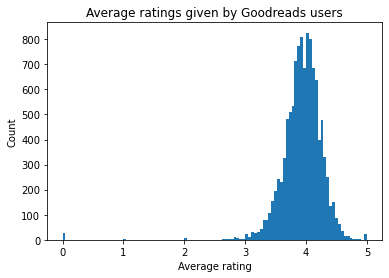

In [24]:
plt.hist(df['average_rating'], bins = 105)
plt.title("Average ratings given by Goodreads users")
plt.xlabel("Average rating")
plt.ylabel("Count")
plt.show()

### Scatterplot of ratings_count vs text_reviews_count

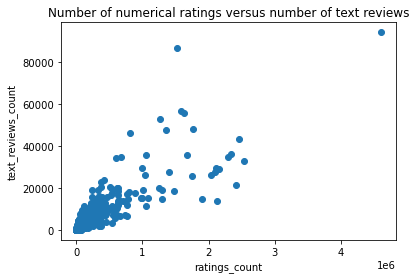

In [25]:
plt.scatter(x = df['ratings_count'], y = df['text_reviews_count'])
plt.title("Number of numerical ratings versus number of text reviews")
plt.xlabel("ratings_count")
plt.ylabel("text_reviews_count")
plt.show()

### Scatterplot of num_pages vs ratings_count

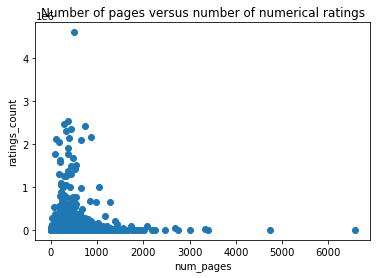

In [26]:
plt.scatter(x = df['num_pages'], y = df['ratings_count'])
plt.title("Number of pages versus number of numerical ratings")
plt.xlabel("num_pages")
plt.ylabel("ratings_count")
plt.show()

### Scatterplot of average_rating vs Approximate sales

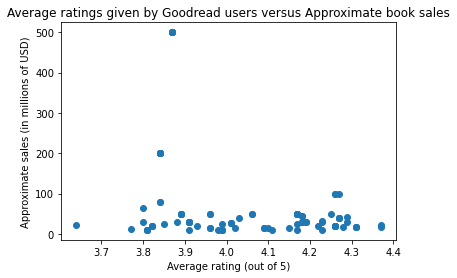

In [27]:
plt.scatter(x = web_match['average_rating'], y = web_match['Approximate sales'])
plt.title("Average ratings given by Goodread users versus Approximate book sales")
plt.xlabel("Average rating (out of 5)")
plt.ylabel("Approximate sales (in millions of USD)")
plt.show()

### Scatterplot of num_pages vs Approximate sales

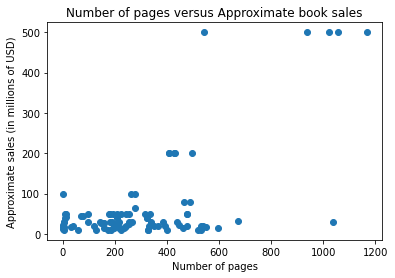

In [28]:
plt.scatter(x = web_match['num_pages'], y = web_match['Approximate sales'])
plt.title("Number of pages versus Approximate book sales")
plt.xlabel("Number of pages")
plt.ylabel("Approximate sales (in millions of USD)")
plt.show()

### Scatterplot of ratings_count vs Approximate sales

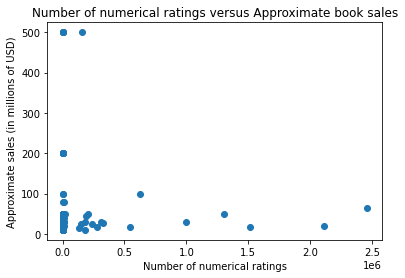

In [29]:
plt.scatter(x = web_match['ratings_count'], y = web_match['Approximate sales'])
plt.title("Number of numerical ratings versus Approximate book sales")
plt.xlabel("Number of numerical ratings")
plt.ylabel("Approximate sales (in millions of USD)")
plt.show()

### Scatterplot of rank vs weeks_on_list

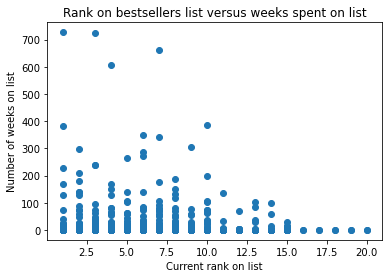

In [30]:
plt.scatter(x = api_df['rank'], y = api_df['weeks_on_list'])
plt.title("Rank on bestsellers list versus weeks spent on list")
plt.xlabel("Current rank on list")
plt.ylabel("Number of weeks on list")
plt.show()

### Histogram of weeks_on_list

In [31]:
math.sqrt(api_df.shape[0])

26.1725046566048

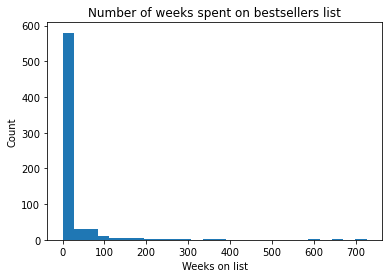

In [32]:
plt.hist(api_df['weeks_on_list'], bins = 26)
plt.title("Number of weeks spent on bestsellers list")
plt.xlabel("Weeks on list")
plt.ylabel("Count")
plt.show()

### Bar plot of num_ratings by first (Year Published)

In [33]:
bar = web_match.groupby(['first']).sum()
years = bar.index
dat = {'Number of ratings' : bar['ratings_count']}

/var/folders/dy/gv7q0xmn72x2t70qkbsbqtgc0000gp/T/ipykernel_14337/3537665360.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 1615, 1665, 1715, 1765, 1815, 1865, 1915, 1965, 2005])


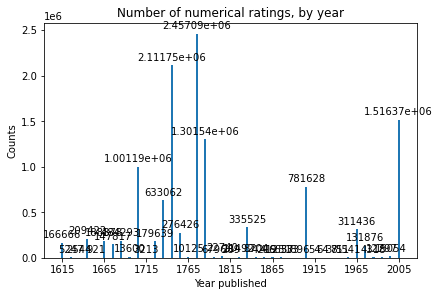

In [34]:
import numpy as np
x = np.arange(len(years))
width = 0.25
multiplier = 0
fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in dat.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
ax.set_ylabel('Counts')
ax.set_xlabel("Year published")
ax.set_title('Number of numerical ratings, by year')
ax.set_xticklabels([0, 1615, 1665, 1715, 1765, 1815, 1865, 1915, 1965, 2005]) 

plt.show()

## Summary

Throughout this course, I have really enjoyed getting to work with the three different data sets and their different formats because it allowed me to really understand what “cleaning the data” really entails. In previous courses, I did not understand all that went into cleaning data and I wemt through those steps a little haphazardly. I enjoyed practicing the cyclical nature that underlies any data cleaning process. Starting with the csv file was interesting because it was my largest data source, and it set the tone for what I was looking for in all my other data sets. What I wish I had had time to explore is the nature of the data pulled from the NYT Books API and how that data would have been better suited to be stored in multiple tables in the database instead of one as that could have helped consolidate the entries and solve the multiplicity seen in the book titles. I would like to learn more about databases because I feel like I just barely scratched the surface in this project and I feel like I did not take advantage of all the strengths inherent in relational databases, but that I am more aware of these strengths now. One thing I funda little surprising with the visualizations, is that I assumed there would be stronger relationships between the data from Goodreads (the csv file) and the book sales (web data); however, there appears to be very little evidence to suggest a strong correlation between any of the user data (number of numerical ratings, number of pages, and average rating) and the approximate sales. Before this, I would assume that the higher rated titles or the number of ratings given (as this data point lends itself to be an indicator of an approximate number of users that read the book) would be a good predictor for higher sales, but there does not seem to be as obvious of a relationship there as I would have thought. 

One of the major ethical implications that continued to show up throughout the data cleaning process for me was the consideration of redundant data, and the decision of whether or not the data contained potentially important information. In all previous milestones, I nearly always opted to keep data rather than discard it in order to have the ability to decide now at the end. For the final dataframe that I worked with for the visualizations, I removed all columns that included redundant information. This was done for efficiency and to make the dataframe as simple as possible, considering the amount of data it held; however, the data for publisher:1 could have very likely been different as many books are published my several different publishers and therefore the different versions are being compared. This does not make a huge difference in the scope of this data as I was imagining this data to be more in the scope of the title itself, regardless of version or print edition, but this could become potentially problematic if the different versions were being looked at more closely (i.e. from a commercial stand point that considered differences in sales between audio, electronic, print, and hardcover editions). Also since the web data did not have ISBN information, it was merged by title which matched the exact values, missing some potential matches and lacked the precision of matching ISBNs (which would match version, edition, and publisher information as well by default). 


## Readable Dataset

In [35]:
print(df.head(60))

    bookID        isbn                                              title  \
0        1   439785960  harry potter and the half-blood prince (harry ...   
1        2   439358078  harry potter and the order of the phoenix (har...   
2        4   439554896  harry potter and the chamber of secrets (harry...   
3        5  043965548x  harry potter and the prisoner of azkaban (harr...   
4        8   439682584  harry potter boxed set  books 1-5 (harry potte...   
5        9   976540606  unauthorized harry potter book seven news: "ha...   
6       10   439827604       harry potter collection (harry potter  #1-6)   
7       12   517226952  the ultimate hitchhiker's guide: five complete...   
8       13   345453743  the ultimate hitchhiker's guide to the galaxy ...   
9       14  1400052920  the hitchhiker's guide to the galaxy (hitchhik...   
10      16   739322206  the hitchhiker's guide to the galaxy (hitchhik...   
11      18   517149257  the ultimate hitchhiker's guide (hitchhiker's ...   

In [36]:
print(df.iloc[2750:2810])

      bookID        isbn                                              title  \
2750   10147  1593080344             the complete sherlock holmes  volume i   
2751   10148  1593080409            the complete sherlock holmes  volume ii   
2752   10156   312425945                               the last of her kind   
2753   10165   449908976  anatomy of love: a natural history of mating  ...   
2754   10170  189491712x  the devil's in the details (a camilla macphee ...   
2755   10172  1565117727        wigfield: the can-do town that just may not   
2756   10173   822216310       the santaland diaries and season's greetings   
2757   10174   312306180          jenny and the jaws of life: short stories   
2758   10200  8644101277                venac sonetnih venaca; puževa srma   
2759   10203   156002167          view with a grain of sand: selected poems   
2760   10204   571191630          view with a grain of sand: selected poems   
2761   22364  1563896311                            

In [37]:
print(df.iloc[8315:8375])

      bookID        isbn                                              title  \
8315   31981   785117598                  astonishing x-men  volume 3: torn   
8316   31983  1569319499                         x/1999  volume 01: prelude   
8317   31985  1569319502                        x/1999  volume 02: overture   
8318   31992  9861146091                                           鋼之鍊金術師 1   
8319   31993  9861146148                                           鋼之鍊金術師 6   
8320   31994  9861156534                                          鋼之鍊金術師 10   
8321   31995  9861146121                                           鋼之鍊金術師 4   
8322   31996  9861156526                                           鋼之鍊金術師 9   
8323   31997  986114613x                                           鋼之鍊金術師 5   
8324   31998  9861146105                                           鋼之鍊金術師 2   
8325   31999  9861146156                                           鋼之鍊金術師 7   
8326   32016  158134449x                        the 

In [38]:
print(df.tail(60))

       bookID        isbn                                              title  \
11067   45420   852237510                                     the home front   
11068   45431   786849606                           half moon investigations   
11069   45432  078685149x                                the supernaturalist   
11070   45436   439443369                                      the wish list   
11071   45438   786855037               legend of the worst boy in the world   
11072   45440   786855010                          the legend of spud murphy   
11073   45442   307344673             la venganza de opal (artemis fowl  #4)   
11074   45444   862786029                                        going potty   
11075   45449  3548603203                    artemis fowl (artemis fowl  #1)   
11076   45450   307350053                              la última oportunidad   
11077   45455  8497939204                    artemis fowl (artemis fowl  #1)   
11078   45462  8484412474             la